In [1]:
pip install yahoofinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf
import warnings 

In [4]:
google = yf.Ticker('GOOG')
df = google.history('5Y')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,0.0,0.0
2018-11-27 00:00:00-05:00,52.049999,52.879002,51.924500,52.220501,36064000,0.0,0.0
2018-11-28 00:00:00-05:00,52.438000,54.341999,51.787998,54.311501,49508000,0.0,0.0
2018-11-29 00:00:00-05:00,53.804001,54.712250,53.799999,54.415001,29378000,0.0,0.0
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,0.0,0.0


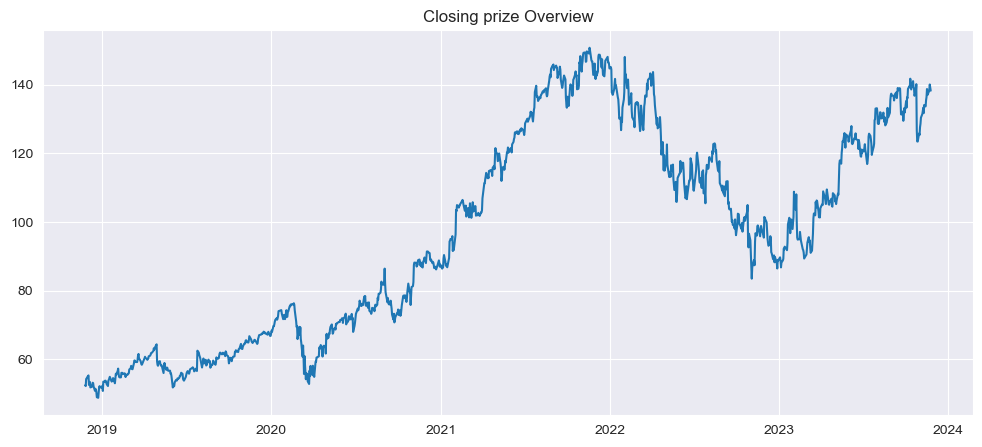

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
plt.title('Closing prize Overview')
plt.plot(df.Close)

In [7]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()
df['200DMA'] = df['Close'].rolling(200).mean()

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,200DMA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000,1209.000000,1059.000000
mean,97.000824,98.135471,95.987602,97.084532,2.948099e+07,0.0,0.015898,97.225268,98.014452
std,30.322960,30.606404,30.012413,30.297514,1.298150e+07,0.0,0.563884,29.369602,26.498808
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,53.194010,56.791503
25%,67.500000,68.034212,67.038126,67.469749,2.115550e+07,0.0,0.000000,68.156175,70.399840
50%,97.939999,99.571003,96.750000,98.070000,2.638530e+07,0.0,0.000000,97.165200,102.222113
75%,124.677876,125.950003,123.297503,124.417500,3.347150e+07,0.0,0.000000,123.651800,119.614493
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [9]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [10]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2018-11-26 00:00:00-05:00,51.917500,52.465500,51.695499,52.431000,38856000,NaN,NaN
2018-11-27 00:00:00-05:00,52.049999,52.879002,51.924500,52.220501,36064000,NaN,NaN
2018-11-28 00:00:00-05:00,52.438000,54.341999,51.787998,54.311501,49508000,NaN,NaN
2018-11-29 00:00:00-05:00,53.804001,54.712250,53.799999,54.415001,29378000,NaN,NaN
2018-11-30 00:00:00-05:00,54.453499,54.778500,53.894001,54.721500,51604000,NaN,NaN


In [11]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2023-11-17 00:00:00-05:00,137.820007,138.000000,135.479996,136.940002,25565300,134.5982,119.862475
2023-11-20 00:00:00-05:00,135.500000,138.425003,135.490005,137.919998,19569400,134.6018,120.025975
2023-11-21 00:00:00-05:00,137.940002,138.964996,137.705002,138.619995,17648100,134.6528,120.201725
2023-11-22 00:00:00-05:00,139.100006,141.100006,139.000000,140.020004,17306400,134.7032,120.361625
2023-11-24 00:00:00-05:00,139.539993,139.677002,137.470001,138.220001,8828600,134.6878,120.552725


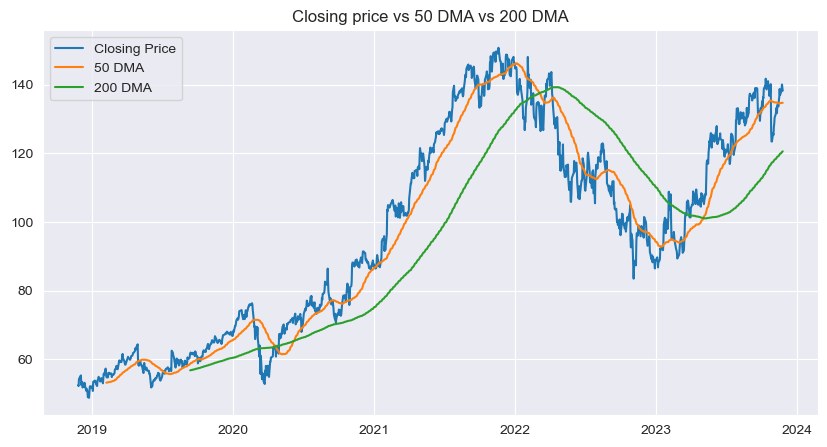

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing price vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Price')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

<AxesSubplot:>

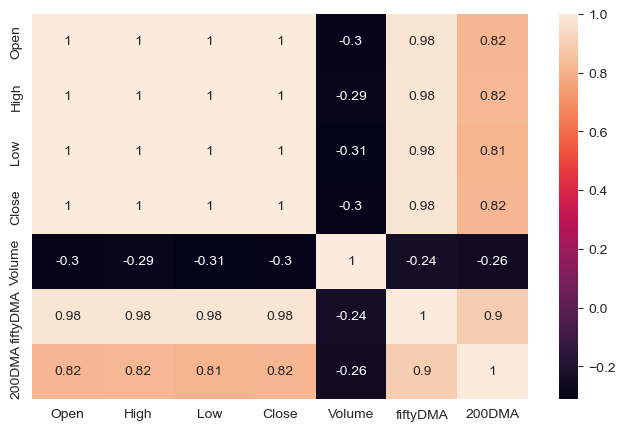

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'50 DMA'}, xlabel='fiftyDMA', ylabel='Count'>

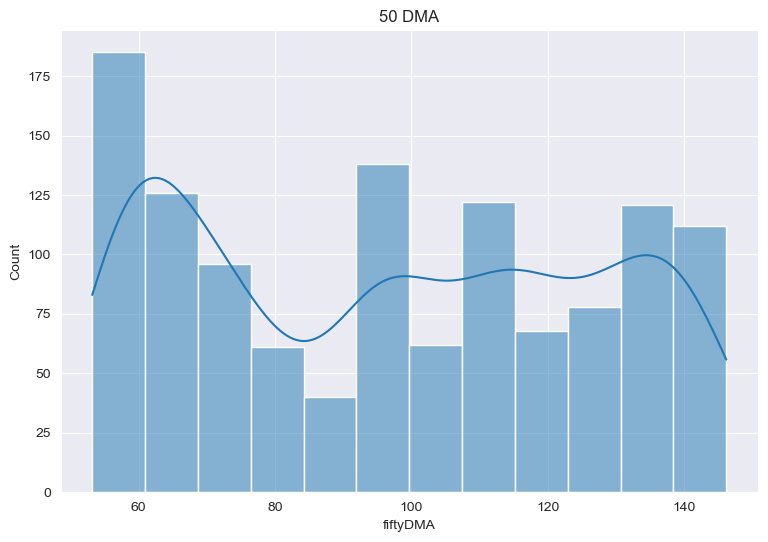

In [17]:
plt.figure(figsize=(9,6))
plt.title('50 DMA')
sns.histplot(x=df['fiftyDMA'],kde=True)

<AxesSubplot:title={'center':'Closing Price'}, xlabel='Close', ylabel='Count'>

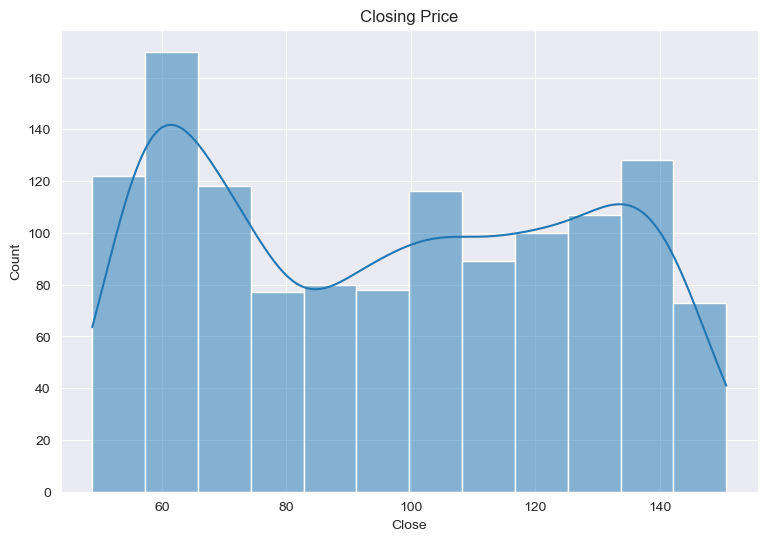

In [18]:
plt.figure(figsize=(9,6))
plt.title('Closing Price')
sns.histplot(x=df['Close'],kde=True)

In [19]:
import statsmodels.formula.api as smf

In [21]:
model = smf.ols(formula='Close ~ fiftyDMA',data=df)
model = model.fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.455e+04
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:45:49   Log-Likelihood:                -3958.8
No. Observations:                1209   AIC:                             7922.
Df Residuals:                    1207   BIC:                             7932.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3389      0.637      5.243      0.000       2.090       4.588
fiftyDMA       0.9825      0.006    156.700      0.000       0.970       0.995
==============================================================================
Omnibus:                       73.136   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.527
Skew:                          -0.617   Prob(JB):                     2.68e-19
Kurtosis:                       3.416   Cond. No.                         351.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

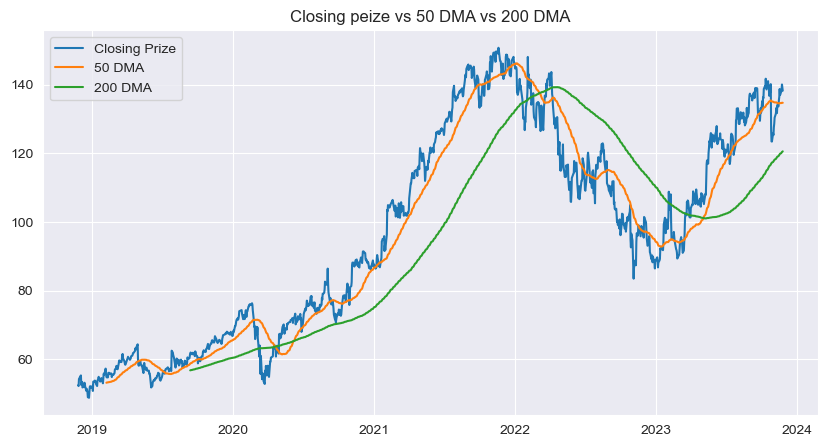

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing peize vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Prize')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

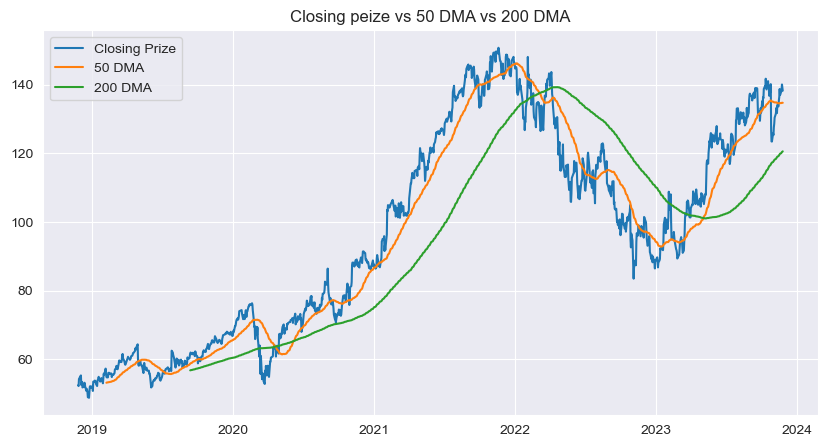

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Closing peize vs 50 DMA vs 200 DMA')
plt.plot(df['Close'],label='Closing Prize')
plt.plot(df['fiftyDMA'],label='50 DMA')
plt.plot(df['200DMA'],label='200 DMA')
plt.legend()

In [26]:
import pandas as pd 
new_data = pd.DataFrame({'fiftyDMA': [105,100,103,110,115]})
predictions = model.predict(new_data)

In [27]:
print(predictions)

0    106.503666
1    101.591060
2    104.538624
3    111.416272
4    116.328878
dtype: float64


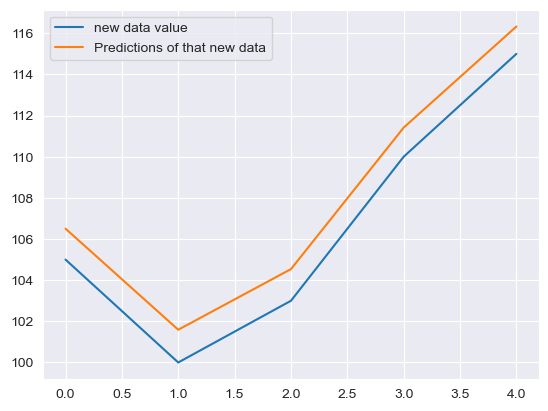

In [28]:
plt.plot(new_data,label='new data value')
plt.plot(predictions,label = 'Predictions of that new data')
plt.legend()

In [29]:
df.max()

Open        1.518635e+02
High        1.521000e+02
Low         1.498875e+02
Close       1.507090e+02
Volume      1.241400e+08
fiftyDMA    1.461839e+02
200DMA      1.392737e+02
dtype: float64

In [30]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,200DMA
Date,,,,,,,
2023-11-17 00:00:00-05:00,137.820007,138.000000,135.479996,136.940002,25565300,134.5982,119.862475
2023-11-20 00:00:00-05:00,135.500000,138.425003,135.490005,137.919998,19569400,134.6018,120.025975
2023-11-21 00:00:00-05:00,137.940002,138.964996,137.705002,138.619995,17648100,134.6528,120.201725
2023-11-22 00:00:00-05:00,139.100006,141.100006,139.000000,140.020004,17306400,134.7032,120.361625
2023-11-24 00:00:00-05:00,139.539993,139.677002,137.470001,138.220001,8828600,134.6878,120.552725
